First 5 rows of data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

/tmp/ipython-input-2884544596.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-2884544596.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

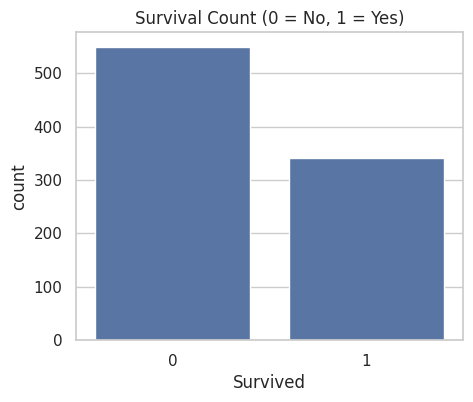

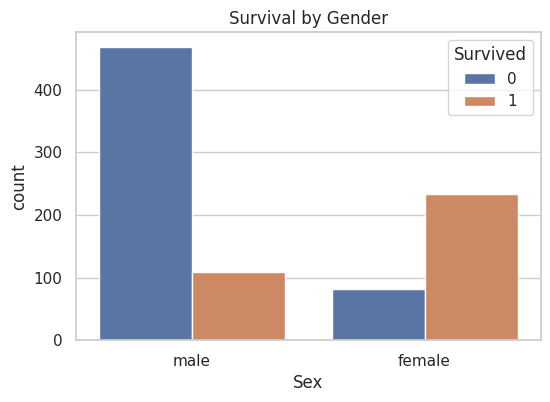

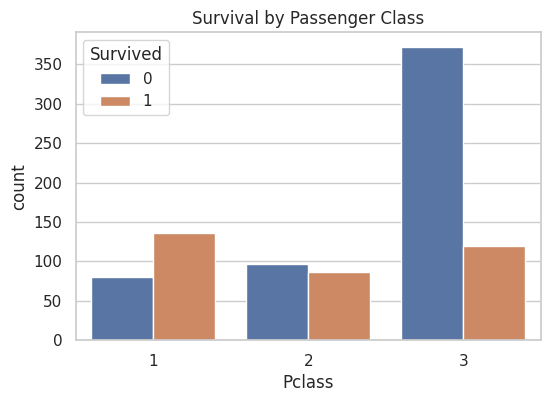

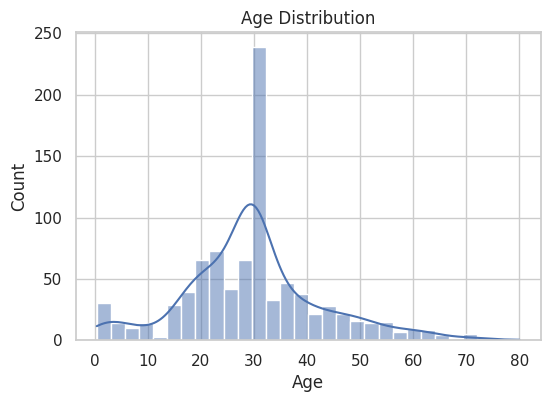


Data after encoding:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  

Feature columns:
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

Train shape: (712, 9)
Test shape: (179, 9)

Model Accuracy: 80.45 %

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      

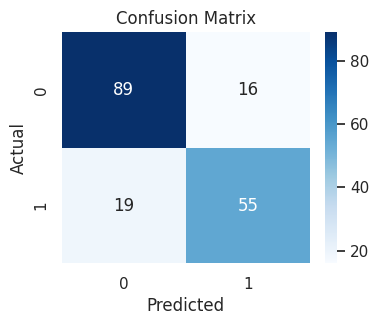


Columns used for prediction:
['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']

Sample passenger:
   PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked_Q  Embarked_S
0         9999       1    0   25      0      0  80.0           0           1

Survival prediction for sample passenger (1 = Survived, 0 = Not Survived): 1


In [14]:
# TITANIC SURVIVAL PREDICTION PROJECT
# -----------------------------------
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For nicer plots
sns.set(style="whitegrid")

# 1. LOAD DATA
# -----------------------------------
# Option 1: Load from URL (no file needed)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# If you downloaded 'train.csv' from Kaggle, use this instead:
# df = pd.read_csv("train.csv")

print("First 5 rows of data:")
print(df.head())
print("\nShape of data:", df.shape)
print("\nInfo:")
print(df.info())

# 2. BASIC DATA CLEANING
# -----------------------------------
# Check missing values
print("\nMissing values:")
print(df.isnull().sum())

# Drop columns that are not useful for our prediction
# Ticket, Cabin, Name can be dropped for a simple model
df = df.drop(['Ticket', 'Cabin', 'Name'], axis=1)

# Handle missing 'Age' with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Handle missing 'Embarked' with mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nData after cleaning:")
print(df.head())

# 3. EXPLORATORY DATA ANALYSIS (EDA)
# -----------------------------------

# Survival count
plt.figure(figsize=(5,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

# Survival by gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Survival by passenger class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# 4. FEATURE ENGINEERING (CONVERT TEXT TO NUMBERS)
# -----------------------------------
# We need to convert 'Sex' and 'Embarked' into numerical values

# Option 1: Label Encoding for 'Sex'
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])   # male/female -> 0/1

# Option 2: One-hot encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("\nData after encoding:")
print(df.head())

# 5. SELECT FEATURES & TARGET
# -----------------------------------
# 'Survived' is our target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

print("\nFeature columns:")
print(X.columns)

# 6. TRAIN-TEST SPLIT
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)

# 7. MODEL TRAINING - LOGISTIC REGRESSION
# -----------------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 8. EVALUATION
# -----------------------------------
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", round(acc * 100, 2), "%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 9. SAMPLE PREDICTION
# -----------------------------------
# Let's create a sample passenger and predict survival.
# Columns in X:
print("\nColumns used for prediction:")
print(list(X.columns))

# Example passenger:
# Pclass: 1 (1st class)
# Sex: 0 = female, 1 = male (check label encoder)
# Age: 25
# SibSp: 0 (no siblings/spouses)
# Parch: 0 (no parents/children)
# Fare: 80
# Embarked_S, Embarked_Q (depends on encoding)

sample_passenger = pd.DataFrame({
    'PassengerId': [9999],
    'Pclass': [1],
    'Sex': [0],      # 0 -> female (after label encoding)
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [80.0],
    'Embarked_Q': [0],
    'Embarked_S': [1]
})

print("\nSample passenger:")
print(sample_passenger)

sample_pred = model.predict(sample_passenger)
print("\nSurvival prediction for sample passenger (1 = Survived, 0 = Not Survived):", sample_pred[0])


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

accuracy_results = {}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = round(accuracy * 100, 2)
    print(f"\n🔹 {name} Accuracy: {round(accuracy * 100, 2)} %")

# Show all accuracies
print("\n\n📊 MODEL PERFORMANCE:")
for model, acc in accuracy_results.items():
    print(f"{model}: {acc}%")



🔹 Logistic Regression Accuracy: 80.45 %

🔹 Decision Tree Accuracy: 72.63 %

🔹 Random Forest Accuracy: 82.68 %

🔹 KNN Accuracy: 65.92 %

🔹 SVM Accuracy: 59.78 %


📊 MODEL PERFORMANCE:
Logistic Regression: 80.45%
Decision Tree: 72.63%
Random Forest: 82.68%
KNN: 65.92%
SVM: 59.78%


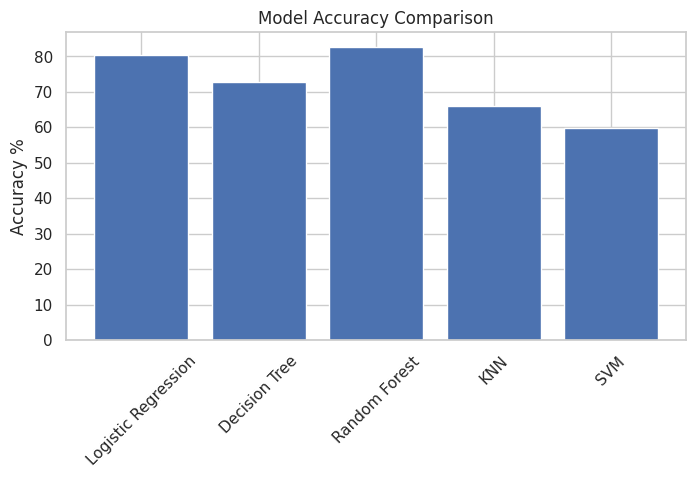

In [16]:
# Plot comparison
plt.figure(figsize=(8,4))
plt.bar(accuracy_results.keys(), accuracy_results.values())
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy %")
plt.show()


In [17]:
best_model = max(accuracy_results, key=accuracy_results.get)
print(f"\n🏆 Best performing model: {best_model} ({accuracy_results[best_model]}%)")



🏆 Best performing model: Random Forest (82.68%)


In [18]:
final_model = models[best_model]
y_pred_best = final_model.predict(X_test)

print("\n📄 Classification Report of Best Model:\n")
print(classification_report(y_test, y_pred_best))



📄 Classification Report of Best Model:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [19]:
# ==========================
# 2. DATA CLEANING + FEATURE ENGINEERING (UPDATED)
# ==========================

print("Missing values before cleaning:")
print(df.isnull().sum())

# 1) Fill missing Age with mean (future-proof assignment style)
df['Age'] = df['Age'].fillna(df['Age'].mean())

# 2) If Embarked exists, fill missing values and encode
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3) Feature: FamilySize = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 4) Feature: IsAlone (1 if alone, 0 otherwise)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# 5) Title extraction only if Name column exists
if 'Name' in df.columns:
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

    # Group rare titles
    df['Title'] = df['Title'].replace(
        ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir',
         'Jonkheer', 'Dona'], 'Rare'
    )
    df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
else:
    df['Title'] = 'Unknown'

print("\nFeature columns added successfully!")
print(df.head())


Missing values before cleaning:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

Feature columns added successfully!
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   Embarked_Q  Embarked_S  FamilySize  IsAlone    Title  
0       False        True           2        0  Unknown  
1       False       False           2        0  Unknown  
2       False        True           1        1  Unknown  
3       False        True           2        0  Unknown  
4       False        True           1

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

print("Columns in df:")
print(df.columns)

print("\nMissing values before cleaning:")
print(df.isnull().sum())

# 1) Fill missing Age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# 2) Feature: FamilySize = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 3) Feature: IsAlone (1 if alone, 0 otherwise)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# 4) Feature: AgeBand (convert Age into groups)
df['AgeBand'] = pd.cut(
    df['Age'],
    bins=[0, 16, 32, 48, 64, 80],
    labels=[0, 1, 2, 3, 4],
    include_lowest=True
).astype(int)

# 5) Encode Sex (male/female -> 0/1)
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nSample rows after feature engineering:")
print(df.head())


Columns in df:
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'Title'],
      dtype='object')

Missing values before cleaning:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
FamilySize     0
IsAlone        0
Title          0
dtype: int64

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
FamilySize     0
IsAlone        0
Title          0
AgeBand        0
dtype: int64

Sample rows after feature engineering:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2        

In [21]:
# Target
y = df['Survived']

# Features: drop target only
X = df.drop(['Survived'], axis=1)

print("\nFeature columns:")
print(X.columns)



Feature columns:
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'Title',
       'AgeBand'],
      dtype='object')


In [22]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
